# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys_openweather import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 571
['adamstown', 'isangel', 'tazovsky', 'bodden town', 'ushuaia', 'whitehorse', 'grytviken', 'stanley', 'coari', 'bethel', 'pikeville', 'margaret river', 'sitka', 'yellowknife', 'cabedelo', 'daru', 'avarua', 'jayapura', 'palmer', 'ilulissat', 'tiksi', 'puerto natales', 'port alfred', 'albany', 'punta arenas', 'lapithos', 'caleta de carquin', 'port-aux-francais', 'suntar', 'bilibino', 'holualoa', 'west island', 'waitangi', 'olonkinbyen', 'blackmans bay', 'concepcion', 'timmins', 'codrington', 'novyy urengoy', 'georgetown', 'edinburgh of the seven seas', 'ar rutbah', 'namsos', 'horta', 'talnakh', 'keflavik', 'bratsk', 'yangjiang', 'iqaluit', 'cestos city', 'vila franca do campo', 'kununurra', 'taiohae', 'dridu', 'acajutla', 'pasuquin', 'lihue', 'jamestown', 'qaqortoq', 'kavaratti', 'cole harbour', 'rio grande', 'shiqian', 'angaur state', 'ribeira grande', 'aasiaat', 'ta`u', 'vorgashor', 'colonia', 'dudinka', 'vidyayevo', 'tsiombe', 'vitoria da conquista', '

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + 'appid=' + weather_api_key + '&q=' + city + '&units=metric'
    #print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    #print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | isangel
Processing Record 3 of Set 1 | tazovsky
Processing Record 4 of Set 1 | bodden town
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | whitehorse
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | stanley
Processing Record 9 of Set 1 | coari
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | pikeville
Processing Record 12 of Set 1 | margaret river
Processing Record 13 of Set 1 | sitka
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | cabedelo
Processing Record 16 of Set 1 | daru
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | jayapura
Processing Record 19 of Set 1 | palmer
Processing Record 20 of Set 1 | ilulissat
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1 | puerto natales
Processing Record 23 of Set 1 | port alfred
P

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,24.88,87,10,9.99,PN,1706813738
1,isangel,-19.5500,169.2667,24.06,88,100,3.60,VU,1706813738
2,tazovsky,67.4667,78.7000,-12.25,94,100,7.81,RU,1706813739
3,bodden town,19.2833,-81.2500,25.55,62,20,5.66,KY,1706813739
4,ushuaia,-54.8000,-68.3000,18.81,34,40,7.72,AR,1706813604


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,24.88,87,10,9.99,PN,1706813738
1,isangel,-19.5500,169.2667,24.06,88,100,3.60,VU,1706813738
2,tazovsky,67.4667,78.7000,-12.25,94,100,7.81,RU,1706813739
3,bodden town,19.2833,-81.2500,25.55,62,20,5.66,KY,1706813739
4,ushuaia,-54.8000,-68.3000,18.81,34,40,7.72,AR,1706813604


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

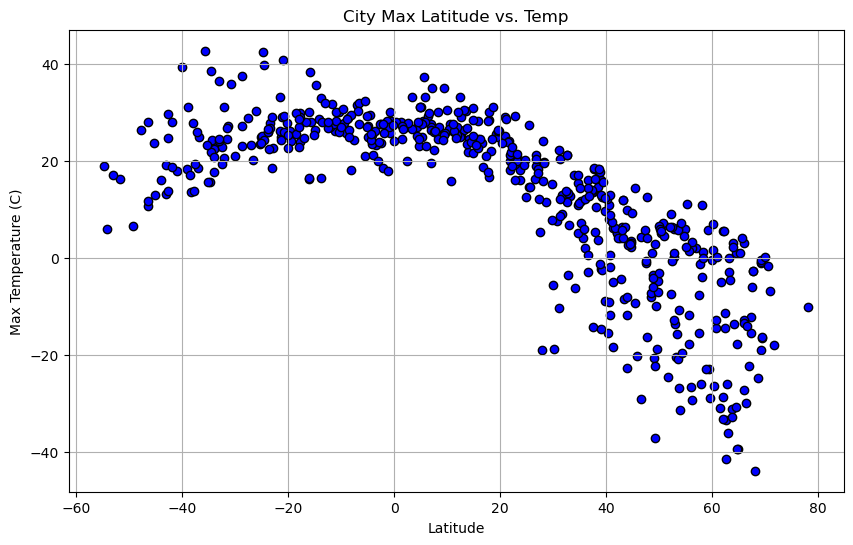

In [11]:
# Build scatter plot for latitude vs. temperature
scatter_lat = city_data_df['Lat']
scatter_max_temp = city_data_df['Max Temp'] 
# Incorporate the other graph properties
plt.figure(figsize=(10, 6))
plt.scatter(scatter_lat, scatter_max_temp, marker='o', color='blue', edgecolors='black')
plt.grid(True)
plt.title('City Max Latitude vs. Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

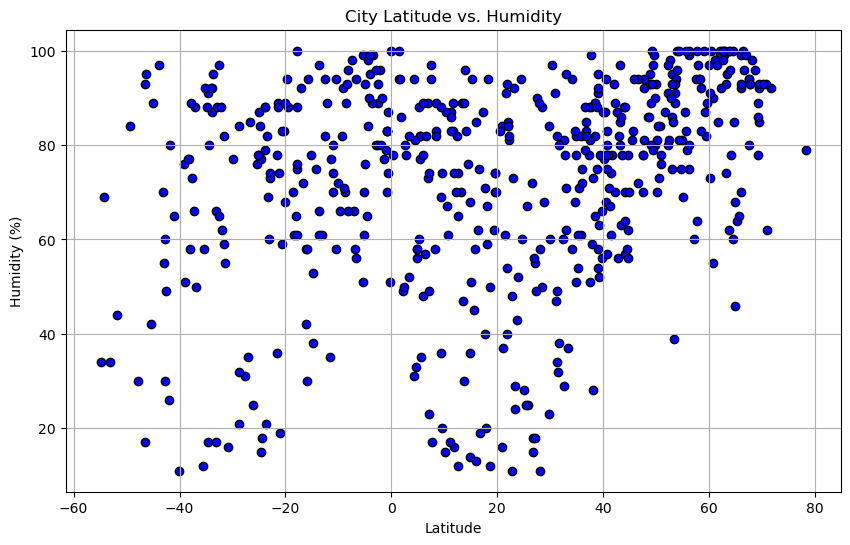

In [12]:
# Build the scatter plots for latitude vs. humidity
scatter_lat = city_data_df['Lat']
scatter_humidity = city_data_df['Humidity'] 
# Incorporate the other graph properties
plt.figure(figsize=(10, 6))
plt.scatter(scatter_lat, scatter_humidity, marker='o', color='blue', edgecolors='black')
plt.grid(True)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

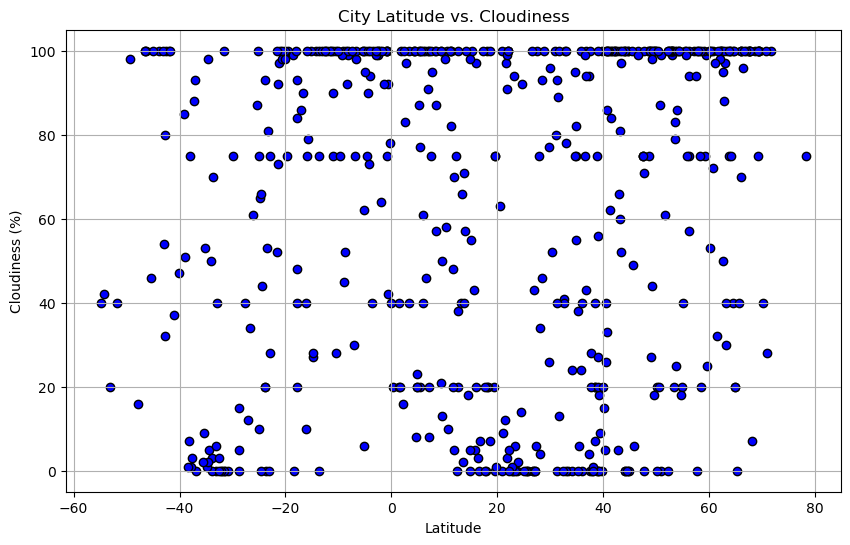

In [13]:
# Build the scatter plots for latitude vs. cloudiness
scatter_lat = city_data_df['Lat']
scatter_cloudiness = city_data_df['Cloudiness'] 
# Incorporate the other graph properties
plt.figure(figsize=(10, 6))
plt.scatter(scatter_lat, scatter_cloudiness, marker='o', color='blue', edgecolors='black')
plt.grid(True)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

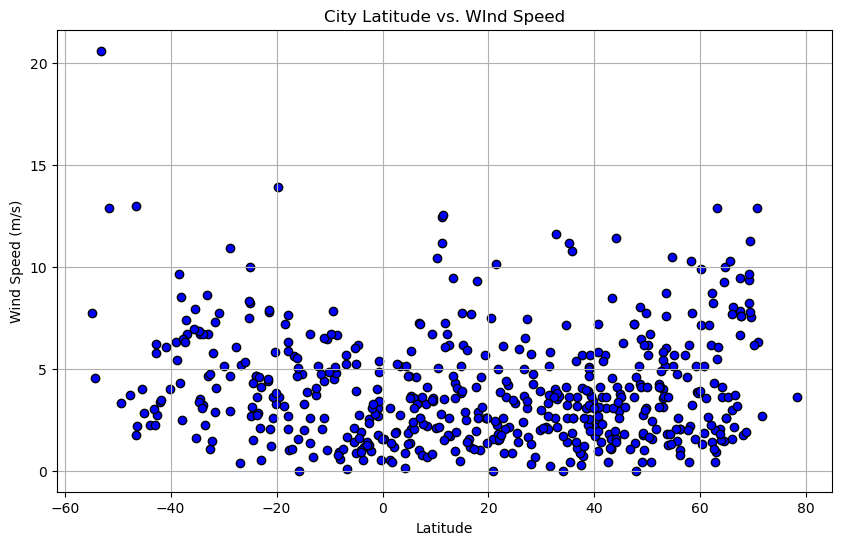

In [14]:
# Build the scatter plots for latitude vs. wind speed
scatter_lat = city_data_df['Lat']
scatter_wind_speed = city_data_df['Wind Speed'] 
# Incorporate the other graph properties
plt.figure(figsize=(10, 6))
plt.scatter(scatter_lat, scatter_wind_speed, marker='o', color='blue', edgecolors='black')
plt.grid(True)
plt.title('City Latitude vs. WInd Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,tazovsky,67.4667,78.7000,-12.25,94,100,7.81,RU,1706813739
3,bodden town,19.2833,-81.2500,25.55,62,20,5.66,KY,1706813739
5,whitehorse,60.7161,-135.0538,-14.57,55,100,5.14,CA,1706813710
7,stanley,54.8680,-1.6985,5.85,81,20,5.14,GB,1706813661
9,bethel,41.3712,-73.4140,6.08,74,100,3.60,US,1706813741


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,24.88,87,10,9.99,PN,1706813738
1,isangel,-19.5500,169.2667,24.06,88,100,3.60,VU,1706813738
4,ushuaia,-54.8000,-68.3000,18.81,34,40,7.72,AR,1706813604
6,grytviken,-54.2811,-36.5092,5.82,69,42,4.56,GS,1706813740
8,coari,-4.0850,-63.1414,25.20,95,94,1.91,BR,1706813741


###  Temperature vs. Latitude Linear Regression Plot

Correlation Coefficient: -0.8216073379008835


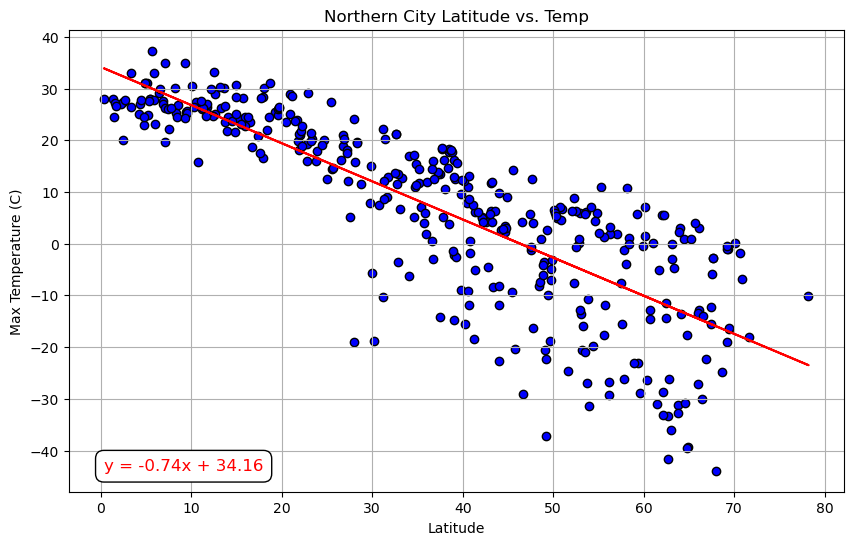

In [17]:
# Linear regression on Northern Hemisphere
correlation_coefficient, _ = st.pearsonr(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
print(f'Correlation Coefficient: {correlation_coefficient}')

slope, intercept, _, _, _ = st.linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

plt.figure(figsize=(10, 6))
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], marker='o', color='blue', edgecolors='black')
plt.plot(northern_hemi_df['Lat'], slope * northern_hemi_df['Lat'] + intercept, color='red', label='Linear Regression')
plt.grid(True)
plt.title('Northern City Latitude vs. Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(northern_hemi_df['Lat'].min(), northern_hemi_df['Max Temp'].min(), equation, color='red', fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()

Correlation Coefficient: 0.35336017912020734


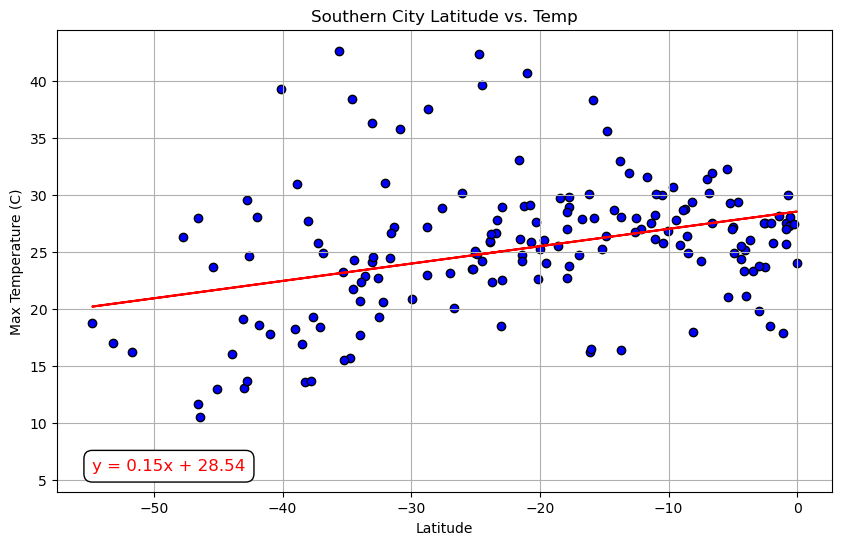

In [18]:
# Linear regression on Southern Hemisphere
correlation_coefficient, _ = st.pearsonr(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
print(f'Correlation Coefficient: {correlation_coefficient}')

slope, intercept, _, _, _ = st.linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

plt.figure(figsize=(10, 6))
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], marker='o', color='blue', edgecolors='black')
plt.plot(southern_hemi_df['Lat'], slope * southern_hemi_df['Lat'] + intercept, color='red', label='Linear Regression')
plt.grid(True)
plt.title('Southern City Latitude vs. Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(southern_hemi_df['Lat'].min(), southern_hemi_df['Max Temp'].min(), equation, color='red', fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()

**Discussion about the linear relationship:** 
- Based on the results, it would appear that the Northern Hemisphere temperature is more strongly effected by distance from the equator than the Southern Hempisphere. However, it appears that our data set contains more Northern cities than Southern Cities, in addition to the fact that the Northern Cities have a greater max latitude than the Southern Cities, which is a result of our inital data set being randomly generated, which may be skewing our results. To account for this, we would want to attempt to more evenly distribute the amount of cities between the Northn and Southern Hemisphere's while also attempting to control max latitude without introducing bias. Either way, we can say with confidence that the farther away you move from the equator, temperature will decrease.

### Humidity vs. Latitude Linear Regression Plot

Correlation Coefficient: 0.4273110553494492


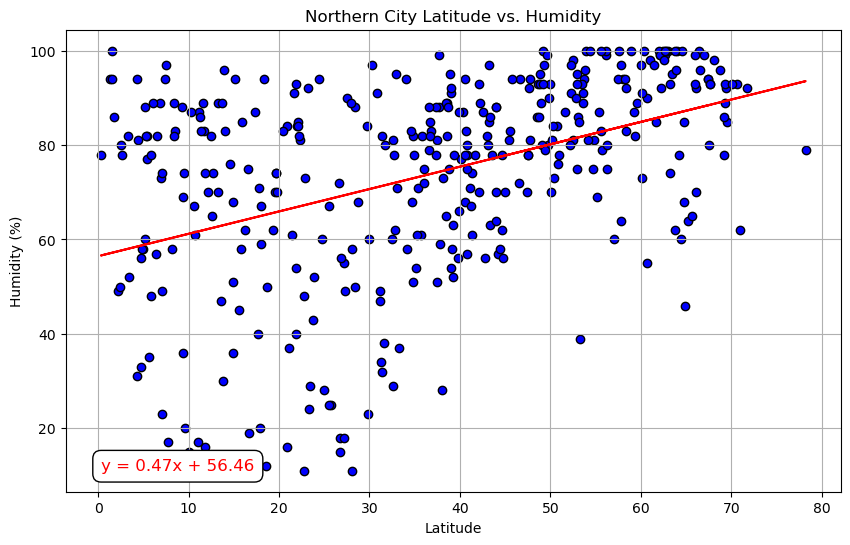

In [19]:
# Northern Hemisphere
correlation_coefficient, _ = st.pearsonr(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
print(f'Correlation Coefficient: {correlation_coefficient}')

slope, intercept, _, _, _ = st.linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

plt.figure(figsize=(10, 6))
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], marker='o', color='blue', edgecolors='black')
plt.plot(northern_hemi_df['Lat'], slope * northern_hemi_df['Lat'] + intercept, color='red', label='Linear Regression')
plt.grid(True)
plt.title('Northern City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(northern_hemi_df['Lat'].min(), northern_hemi_df['Humidity'].min(), equation, color='red', fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()

Correlation Coefficient: 0.33139659725221227


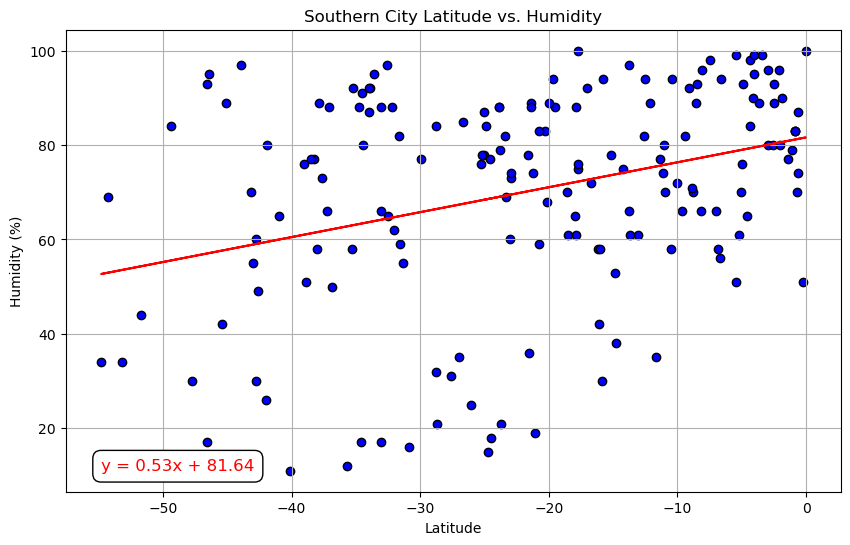

In [20]:
# Southern Hemisphere
correlation_coefficient, _ = st.pearsonr(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
print(f'Correlation Coefficient: {correlation_coefficient}')

slope, intercept, _, _, _ = st.linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

plt.figure(figsize=(10, 6))
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], marker='o', color='blue', edgecolors='black')
plt.plot(southern_hemi_df['Lat'], slope * southern_hemi_df['Lat'] + intercept, color='red', label='Linear Regression')
plt.grid(True)
plt.title('Southern City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(southern_hemi_df['Lat'].min(), southern_hemi_df['Humidity'].min(), equation, color='red', fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()

**Discussion about the linear relationship:** 
- Based on the results, it would appear that distance from the equator has some effect on humidity for both the northern and southern hemispheres, however, based on the correlation coefficients, the relationship is weak at best

### Cloudiness vs. Latitude Linear Regression Plot

Correlation Coefficient: 0.2395157005851213


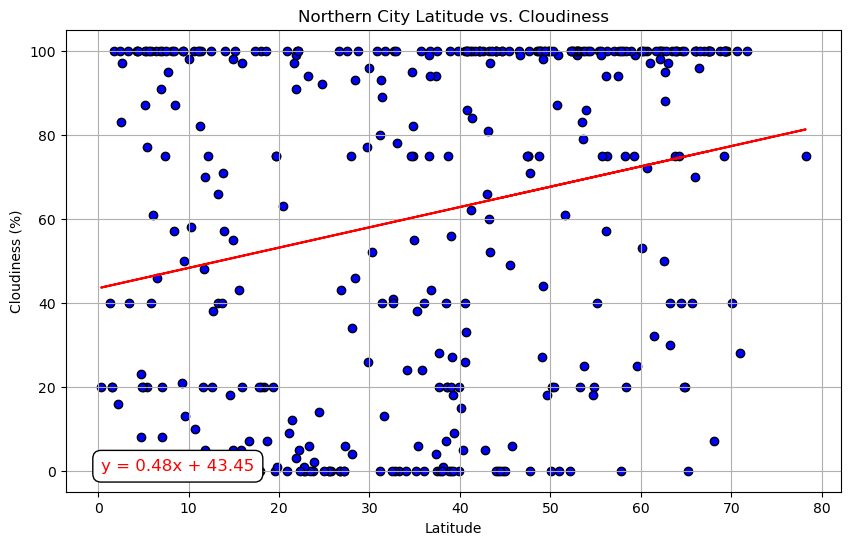

In [21]:
# Northern Hemisphere
correlation_coefficient, _ = st.pearsonr(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
print(f'Correlation Coefficient: {correlation_coefficient}')

slope, intercept, _, _, _ = st.linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

plt.figure(figsize=(10, 6))
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], marker='o', color='blue', edgecolors='black')
plt.plot(northern_hemi_df['Lat'], slope * northern_hemi_df['Lat'] + intercept, color='red', label='Linear Regression')
plt.grid(True)
plt.title('Northern City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(northern_hemi_df['Lat'].min(), northern_hemi_df['Cloudiness'].min(), equation, color='red', fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()

Correlation Coefficient: 0.38441001304002154


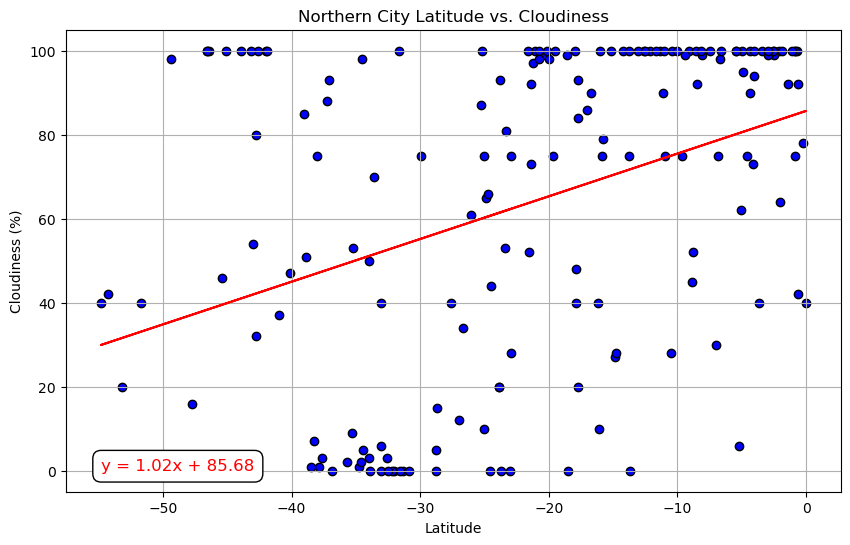

In [22]:
# Southern Hemisphere
correlation_coefficient, _ = st.pearsonr(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
print(f'Correlation Coefficient: {correlation_coefficient}')

slope, intercept, _, _, _ = st.linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

plt.figure(figsize=(10, 6))
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], marker='o', color='blue', edgecolors='black')
plt.plot(southern_hemi_df['Lat'], slope * southern_hemi_df['Lat'] + intercept, color='red', label='Linear Regression')
plt.grid(True)
plt.title('Northern City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(southern_hemi_df['Lat'].min(), southern_hemi_df['Cloudiness'].min(), equation, color='red', fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()

**Discussion about the linear relationship:** 
- Based on the results, it would appear that distance from the equator has little to no effect on cloudiness for both the northern and southern hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

Correlation Coefficient: 0.18412388681307051


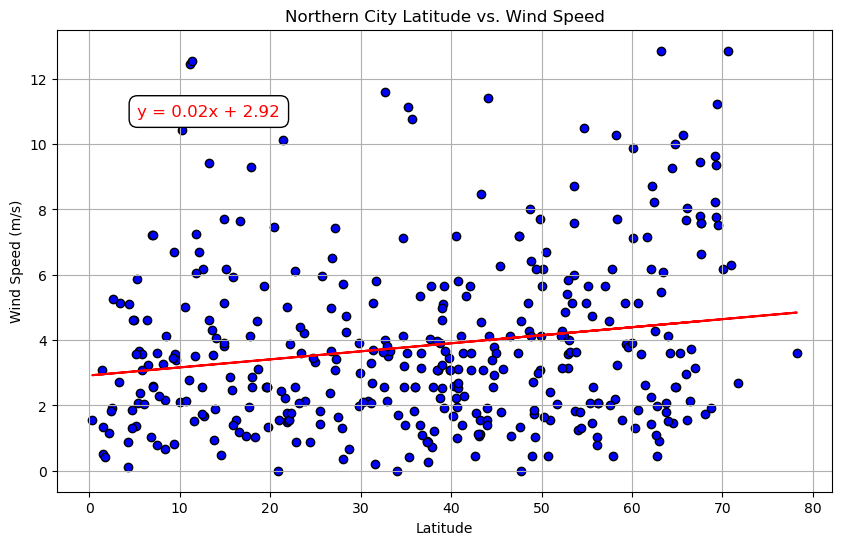

In [23]:
# Northern Hemisphere
correlation_coefficient, _ = st.pearsonr(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
print(f'Correlation Coefficient: {correlation_coefficient}')

slope, intercept, _, _, _ = st.linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

plt.figure(figsize=(10, 6))
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], marker='o', color='blue', edgecolors='black')
plt.plot(northern_hemi_df['Lat'], slope * northern_hemi_df['Lat'] + intercept, color='red', label='Linear Regression')
plt.grid(True)
plt.title('Northern City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(northern_hemi_df['Lat'].min() + 5, northern_hemi_df['Wind Speed'].max() - 2, equation, color='red', fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()

Correlation Coefficient: -0.3811274407230495


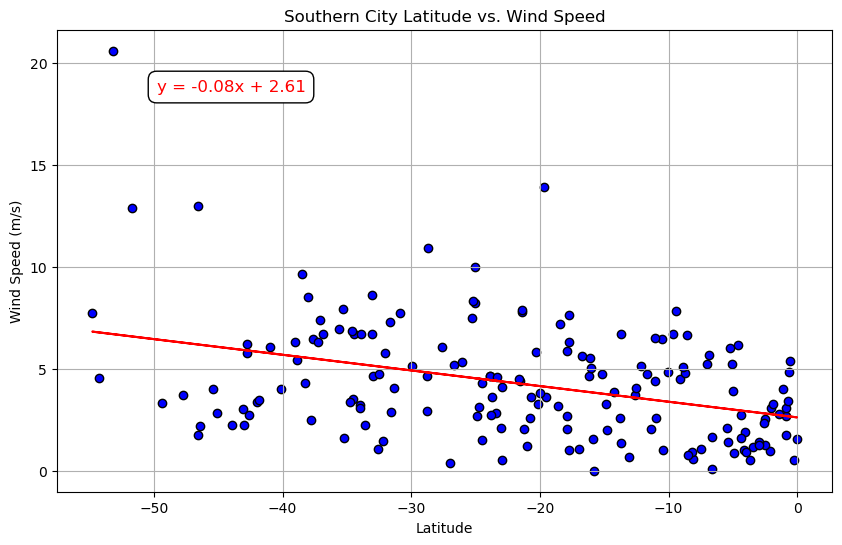

In [24]:
# Southern Hemisphere
correlation_coefficient, _ = st.pearsonr(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
print(f'Correlation Coefficient: {correlation_coefficient}')

slope, intercept, _, _, _ = st.linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

plt.figure(figsize=(10, 6))
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], marker='o', color='blue', edgecolors='black')
plt.plot(southern_hemi_df['Lat'], slope * southern_hemi_df['Lat'] + intercept, color='red', label='Linear Regression')
plt.grid(True)
plt.title('Southern City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(southern_hemi_df['Lat'].min() + 5, southern_hemi_df['Wind Speed'].max() - 2, equation, color='red', fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()

**Discussion about the linear relationship:** 
- Based on the results, it would appear that distance from the equator has little to no effect on wind speed for both the northern and southern hemispheres.